<a href="https://colab.research.google.com/github/alfcastillo90/evaluando_modelos_ml/blob/main/evaluacion_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Instalaciones requeridas

In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install mlxtend

# Lectura del dataset

In [3]:
import pandas as pd
path = "/content/gdrive/MyDrive/Estudios/coderhouse/data_science/melb_data.csv";
dataset = pd.read_csv(path, sep=",")
dataset.info()
# Nombres de las columnas del DataFrame
print("\nNombres de las columnas:")
dataset.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

# Visualizaciones

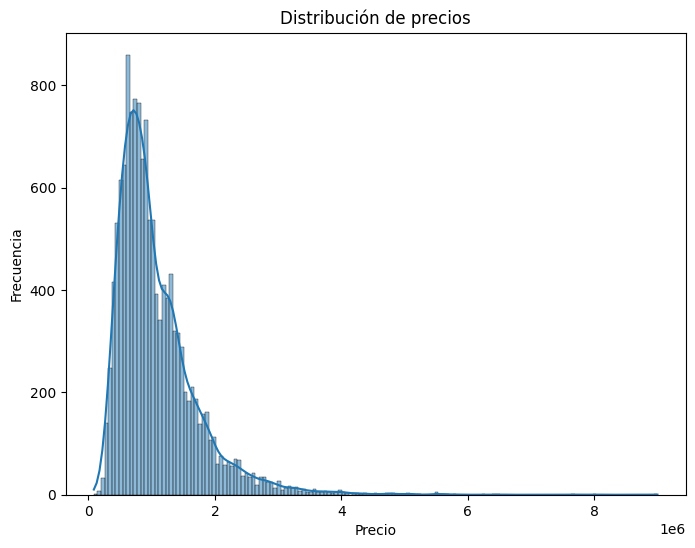

count    13580.000000
mean         2.937997
std          0.955748
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         10.000000
Name: Rooms, dtype: float64


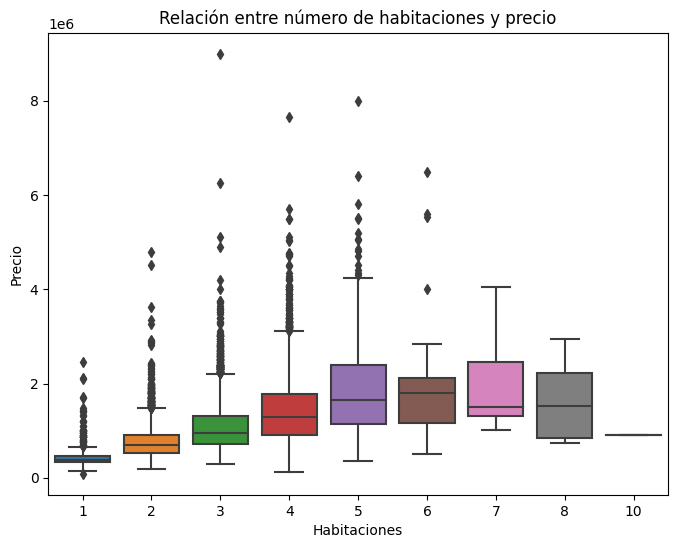

count    13580.000000
mean        10.137776
std          5.868725
min          0.000000
25%          6.100000
50%          9.200000
75%         13.000000
max         48.100000
Name: Distance, dtype: float64


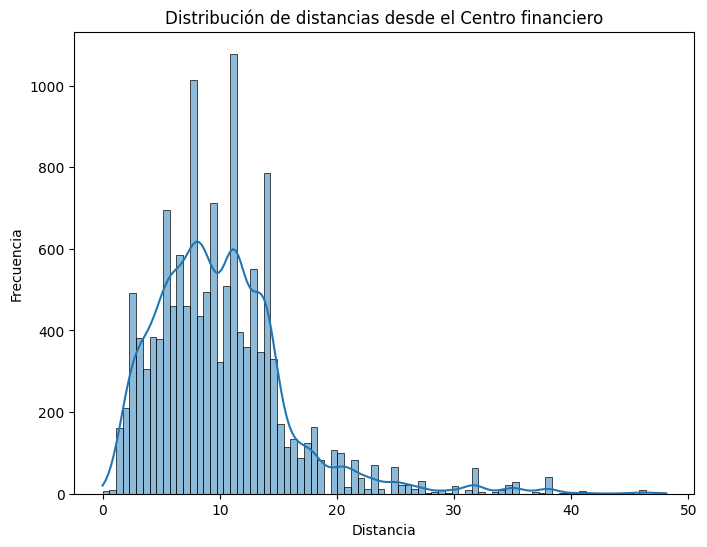

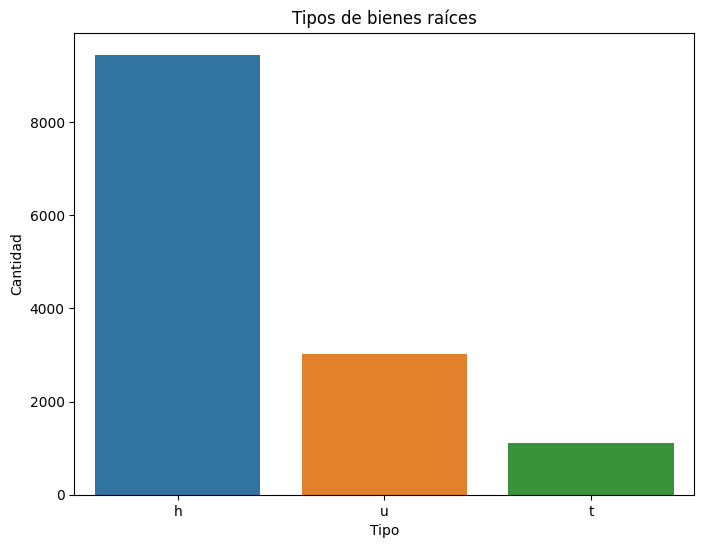

count     13580.000000
mean        558.416127
std        3990.669241
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64
count    13580.000000
mean         1.534242
std          0.691712
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: Bathroom, dtype: float64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución de precios
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Price'], kde=True)
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Resumen numérico básico de la variable "Rooms"
print(dataset['Rooms'].describe())

# Visualización de la relación entre "Rooms" y "Price"
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rooms', y='Price', data=dataset)
plt.title('Relación entre número de habitaciones y precio')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.show()

# Resumen numérico básico de la variable "Distance"
print(dataset['Distance'].describe())

# Visualización de la distribución de distancias desde el Centro financiero
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Distance'], kde=True)
plt.title('Distribución de distancias desde el Centro financiero')
plt.xlabel('Distancia')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de los tipos de bienes raíces
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=dataset)
plt.title('Tipos de bienes raíces')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.show()

# Resumen numérico básico de la variable "Landsize"
print(dataset['Landsize'].describe())

# Resumen numérico básico de la variable "Bathroom"
print(dataset['Bathroom'].describe())


# implementación de backward selection

In [5]:
# eliminamos los NaN
dataset = dataset.dropna()
# Supongamos que 'Price' es la columna objetivo en tu conjunto de datos

# Creamos la matriz de características eliminando la columna 'Price'
X = dataset.drop("Price", axis=1)

# Creamos la característica objetivo guardando la columna 'Price' en una variable separada
y = dataset['Price']

# Mostramos las primeras 5 filas del DataFrame original
dataset.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [10]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import numpy as np

#creamos un nuevo dataset nummerico
numeric_dataset = dataset.select_dtypes(include=[np.number])


sfs = SFS(LinearRegression(),
          k_features=12,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs = sfs.fit(numeric_dataset.drop("Price", axis=1), numeric_dataset["Price"])
sfs.k_feature_names_


('Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount')